# Reconocimiento facial

In [1]:
# Librerías y dependencias
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import warnings
from IPython.display import display
import numpy as np

# Evitamos los molestos warnings
warnings.simplefilter("ignore")

In [2]:
# Dataset
faces = fetch_lfw_people(min_faces_per_person=60)

# Targets
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [3]:
# Descripción del dataset
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

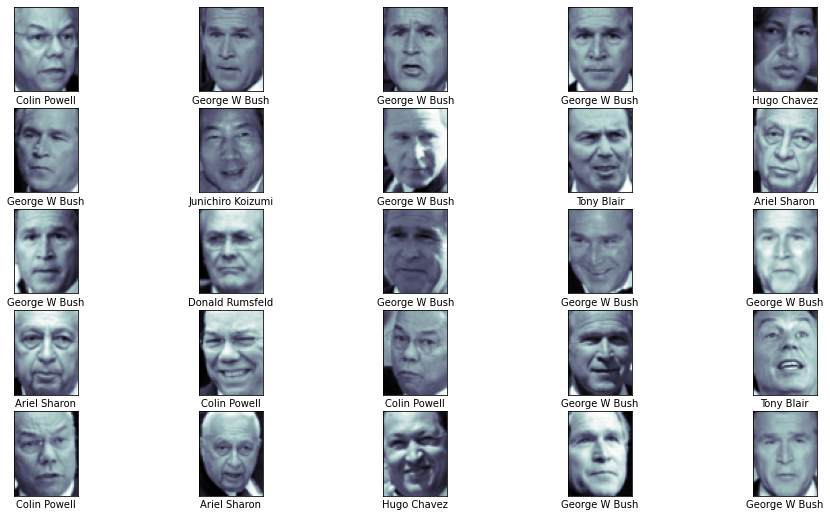

In [4]:
# Observamos el dataset y las etiquetas que tenemos
fig, ax = plt.subplots(5,5, figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [5]:
# Dimensiones del dataset
display(faces.images.shape)

# Número de píxeles
pixels = 62 * 47
print(f'Dimensiones por píxel: {pixels}')

(1348, 62, 47)

Dimensiones por píxel: 2914


In [6]:
"""
1. Importamos nuestro clasificador
2. Importamos nuestro segundo modelo para reducir la dimensionalidad
3. Importamos nuestro Pipeline 
"""

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [7]:
# Almacenamos los datos en variables
X = faces.data
y = faces.target

X = pd.DataFrame(X)
y = pd.DataFrame(y)

display(X.shape)
display(y.shape)

(1348, 2914)

(1348, 1)

In [8]:
"""
1. Hacemos Cross Validation a nuestros datos de entrenamiento y test por medio de Stratified K-Fold
2. Printeamos para saber si la distribución fue la correcta
"""
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
skf.get_n_splits(X,y)

for train, test in skf.split(X,y):

    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]


display(f'Datos de entrenamiento de X: {len(X_train)}')
display(f'Datos de prueba de X: {len(X_test)}')
display(f'Datos de entrenamiento de Y: {len(y_train)}')
display(f'Datos de prueba de Y: {len(y_test)}')

'Datos de entrenamiento de X: 1079'

'Datos de prueba de X: 269'

'Datos de entrenamiento de Y: 1079'

'Datos de prueba de Y: 269'

In [9]:
"""
1. Importamos nuestra grilla de parámetros
2. Creamos nuestra grilla con los mejores parámetros
3. Le pasamos a la grilla nuestro modelo y nuestra grilla con los parámetros
4. Entrenamos nuestra grilla con los datos de entrenamiento
"""

from sklearn.model_selection import GridSearchCV

param_grid = {
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)

Wall time: 48 s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [10]:
# Mejores parámetros
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


In [11]:
# Mejor modelo / clasificador
classifier = grid.best_estimator_
print(classifier)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.005))])


In [12]:
# Predicciones
y_pred = classifier.predict(X_test)
print(y_pred)

[3 7 3 2 0 3 1 3 0 1 3 1 1 3 1 7 3 6 3 6 3 3 4 5 7 3 3 3 3 7 3 4 7 7 7 3 1
 4 3 1 3 4 3 1 1 3 3 3 3 3 4 1 3 3 3 3 3 4 1 3 3 3 3 2 3 3 2 3 3 3 1 1 2 2
 3 3 7 3 3 3 3 3 1 3 2 3 3 7 3 3 7 3 6 4 2 3 1 5 3 3 7 7 7 3 0 3 3 3 3 4 1
 0 4 0 4 3 1 3 3 3 1 1 1 4 3 1 4 1 4 1 3 2 5 3 7 1 7 7 2 5 7 7 1 3 1 3 2 7
 3 2 3 1 5 0 3 4 5 3 4 7 2 6 1 1 3 3 3 3 3 1 3 2 1 3 0 1 3 1 2 6 6 1 3 3 3
 3 3 3 5 3 7 3 6 1 3 3 3 3 3 3 0 3 3 4 7 3 3 2 3 3 1 1 3 4 1 7 3 7 6 3 3 3
 1 0 3 1 2 3 3 1 2 1 7 7 7 3 5 3 7 2 4 3 3 3 3 1 1 2 1 1 3 1 2 4 5 3 1 0 3
 3 1 3 6 1 2 3 5 3 7]


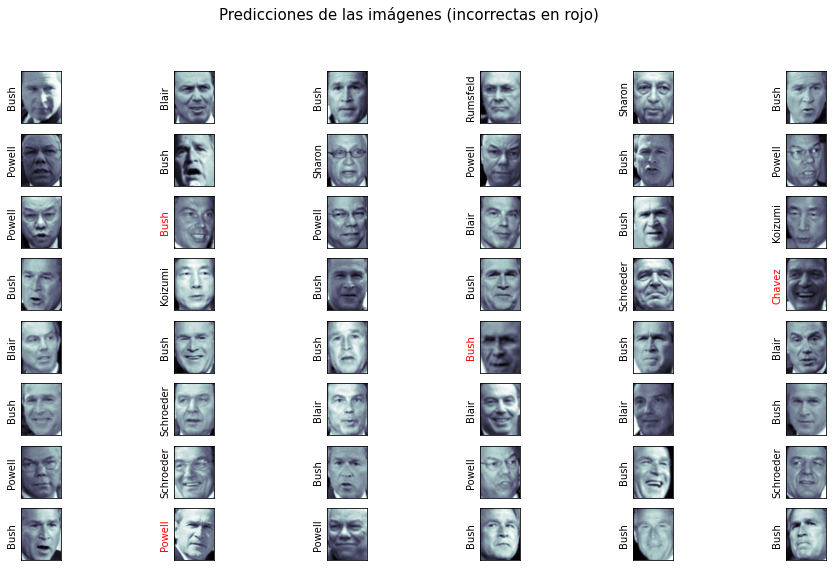

In [13]:
# Visualizamos las predicciones
X_train = np.array(X_train)
X_test = np.array(X_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(X_test[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color = "black" if y_pred[i]==y_test[i] else "red")

fig.suptitle("Predicciones de las imágenes (incorrectas en rojo)", size = 15);

In [14]:
# Observamos las métricas de las predicciones
from sklearn.metrics import classification_report

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.67      0.80        15
     Colin Powell       0.84      0.89      0.87        47
  Donald Rumsfeld       0.95      0.83      0.89        24
    George W Bush       0.86      0.98      0.92       106
Gerhard Schroeder       1.00      0.86      0.93        22
      Hugo Chavez       0.90      0.64      0.75        14
Junichiro Koizumi       1.00      0.75      0.86        12
       Tony Blair       0.90      0.90      0.90        29

         accuracy                           0.89       269
        macro avg       0.93      0.82      0.86       269
     weighted avg       0.90      0.89      0.89       269



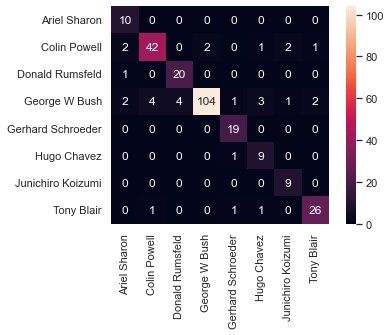

In [15]:
"""
1. Importamos nuestra Matriz de Confusión
2. Visualizamos en ella las predicciones
"""

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.show();